1. 在一个Figure的两个Axes内分别绘制y=log(x)在x=0.01-100区间内的曲线。左边的Axes内采用线性（默认）横坐标绘图，右边的Axes内采用对数横坐标绘图。左边的曲线用蓝色，右边的曲线用绿色。为每个Axes添加你自己喜欢的横坐标标签、纵坐标标签和题目。以png格式保存这张图片。

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

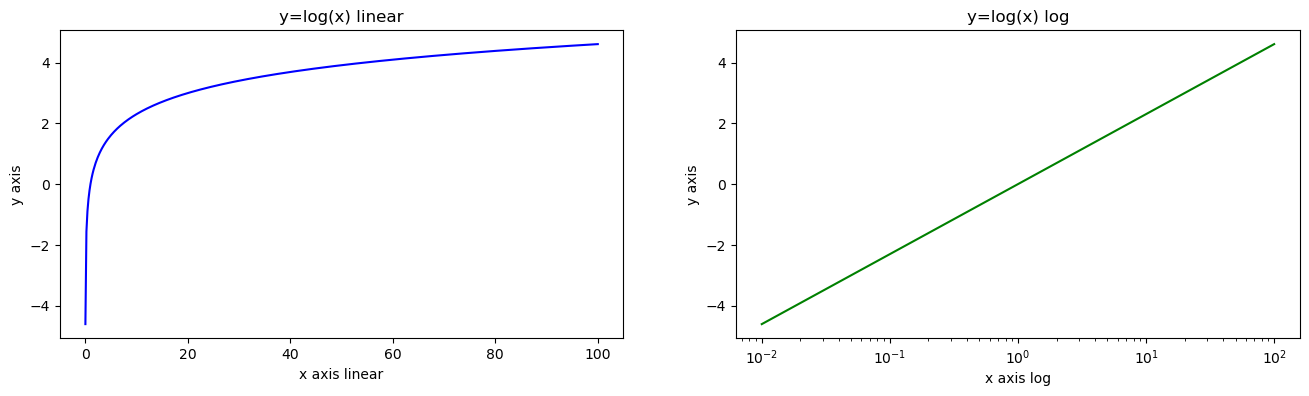

In [2]:
#题1 
# >>> TODO
x = np.linspace(0.01, 100, 500)
y = np.log(x)
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(x, y, color='blue')
plt.xlabel('x axis linear')
plt.ylabel('y axis')
plt.title('y=log(x) linear')
plt.subplot(122)
plt.xscale('log')
plt.plot(x, y, color='green')
plt.xlabel('x axis log')
plt.ylabel('y axis')
plt.title('y=log(x) log')
plt.savefig('ex1.png')
# <<< TODO

2. 利用第1讲练习2生成的字符图像数据集，分别统计每幅图像上半部和下半部的黑像素数目（可利用PIL库），把这两个数值组成该图像的特征向量。全部统计完成后，绘制所有图像样本在特征空间的散点图，注明横纵坐标含义及图题。

Text(0.5, 1.0, '图像的特征向量')

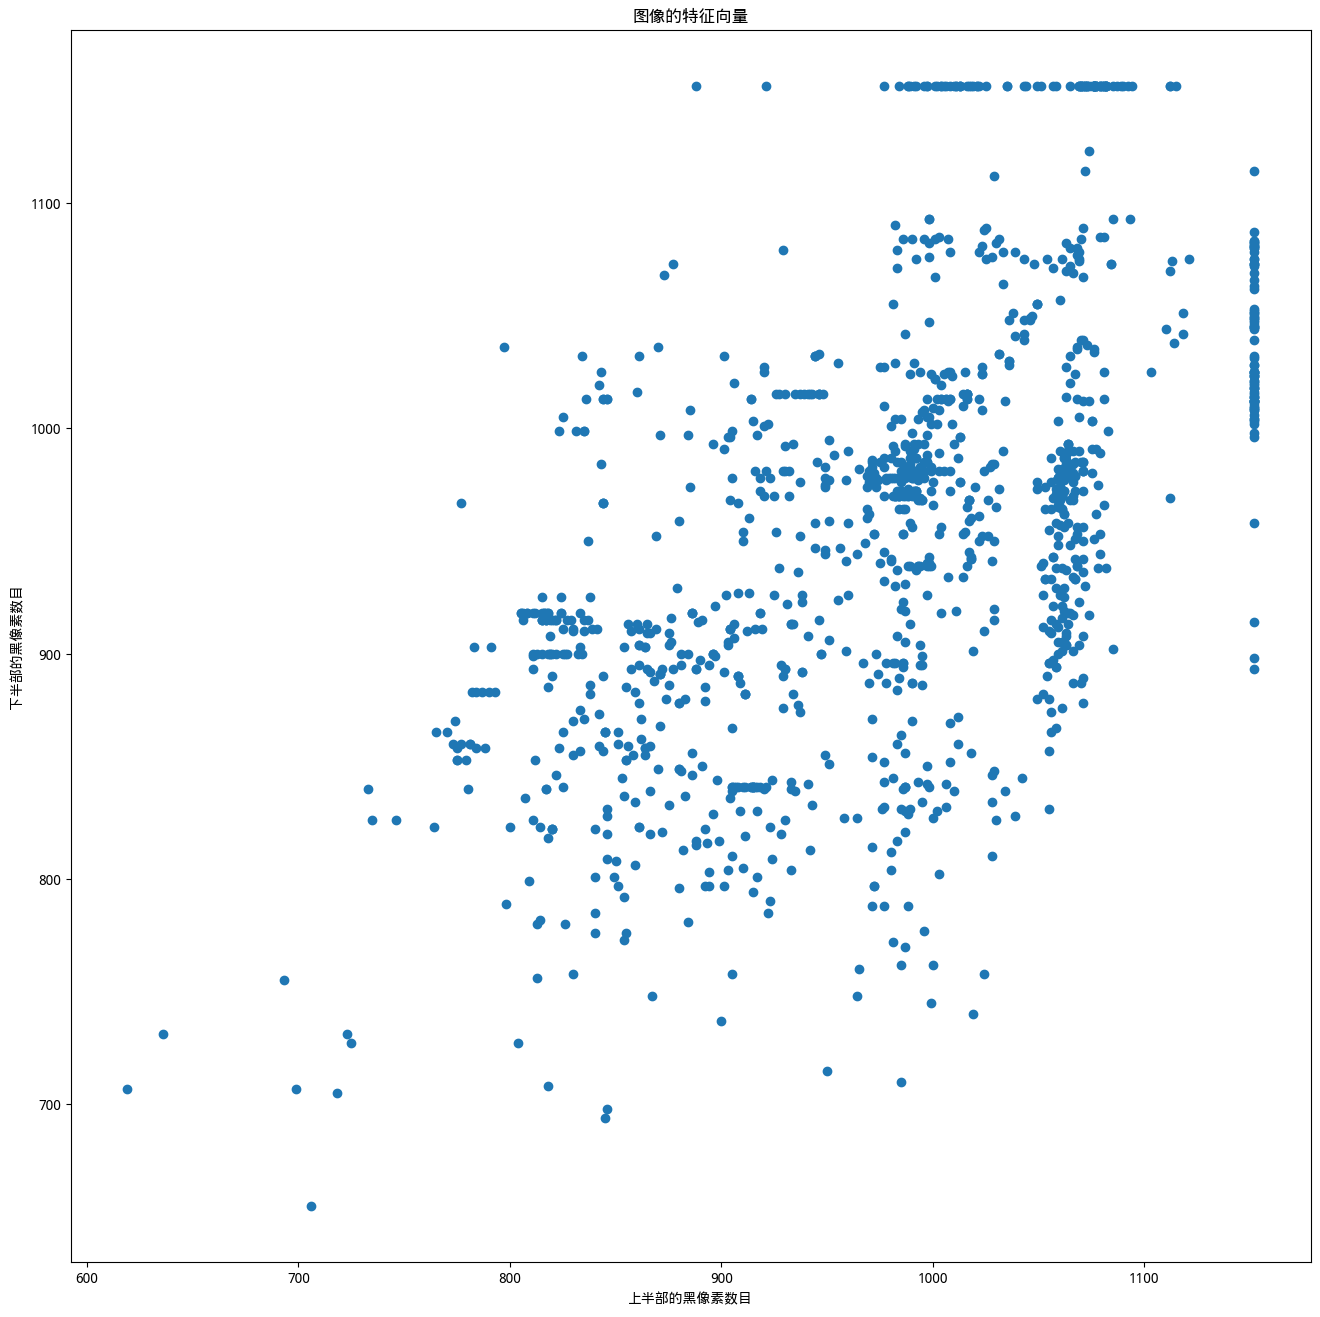

In [3]:
chars = [
    range(0x0021,0x007E+1),range(0x00A1,0x00AC+1),range(0x00AE,0x0377+1),range(0x037A,0x037F+1),
    range(0x0384,0x038A+1),range(0x038C,0x038C+1),range(0x038E,0x052F+1)
]

chars = [j for i in chars for j in i] #图像名称，参见第1讲练习2

# >>> TODO
import cv2
image = [cv2.imread('./data/0x{:04X}.jpg'.format(i)) for i in chars]
up = []
dn = []
for i in image:
    black_up = black_dn = 0
    for j in i[:24]:
        for k in j:
            if np.sum(k) == 0:
                black_up += 1
    for j in i[24:]:
        for k in j:
            if np.sum(k) == 0:
                black_dn += 1
    up.append(black_up)
    dn.append(black_dn)
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
plt.figure(figsize=(16,16))
plt.scatter(up, dn)
plt.xlabel('上半部的黑像素数目')
plt.ylabel('下半部的黑像素数目')
plt.title('图像的特征向量')
# <<< TODO

3. 对于上一步生成的特征向量，估计二元正态分布的均值向量和协方差矩阵，绘制二元正态分布概率密度函数的三维曲面图

[979.03913738 956.79792332]
[[9460.89455017 5294.96155216]
 [5294.96155216 9088.95593493]]


Text(0.5, 0.92, '二元正态分布概率密度函数的三维曲面图')

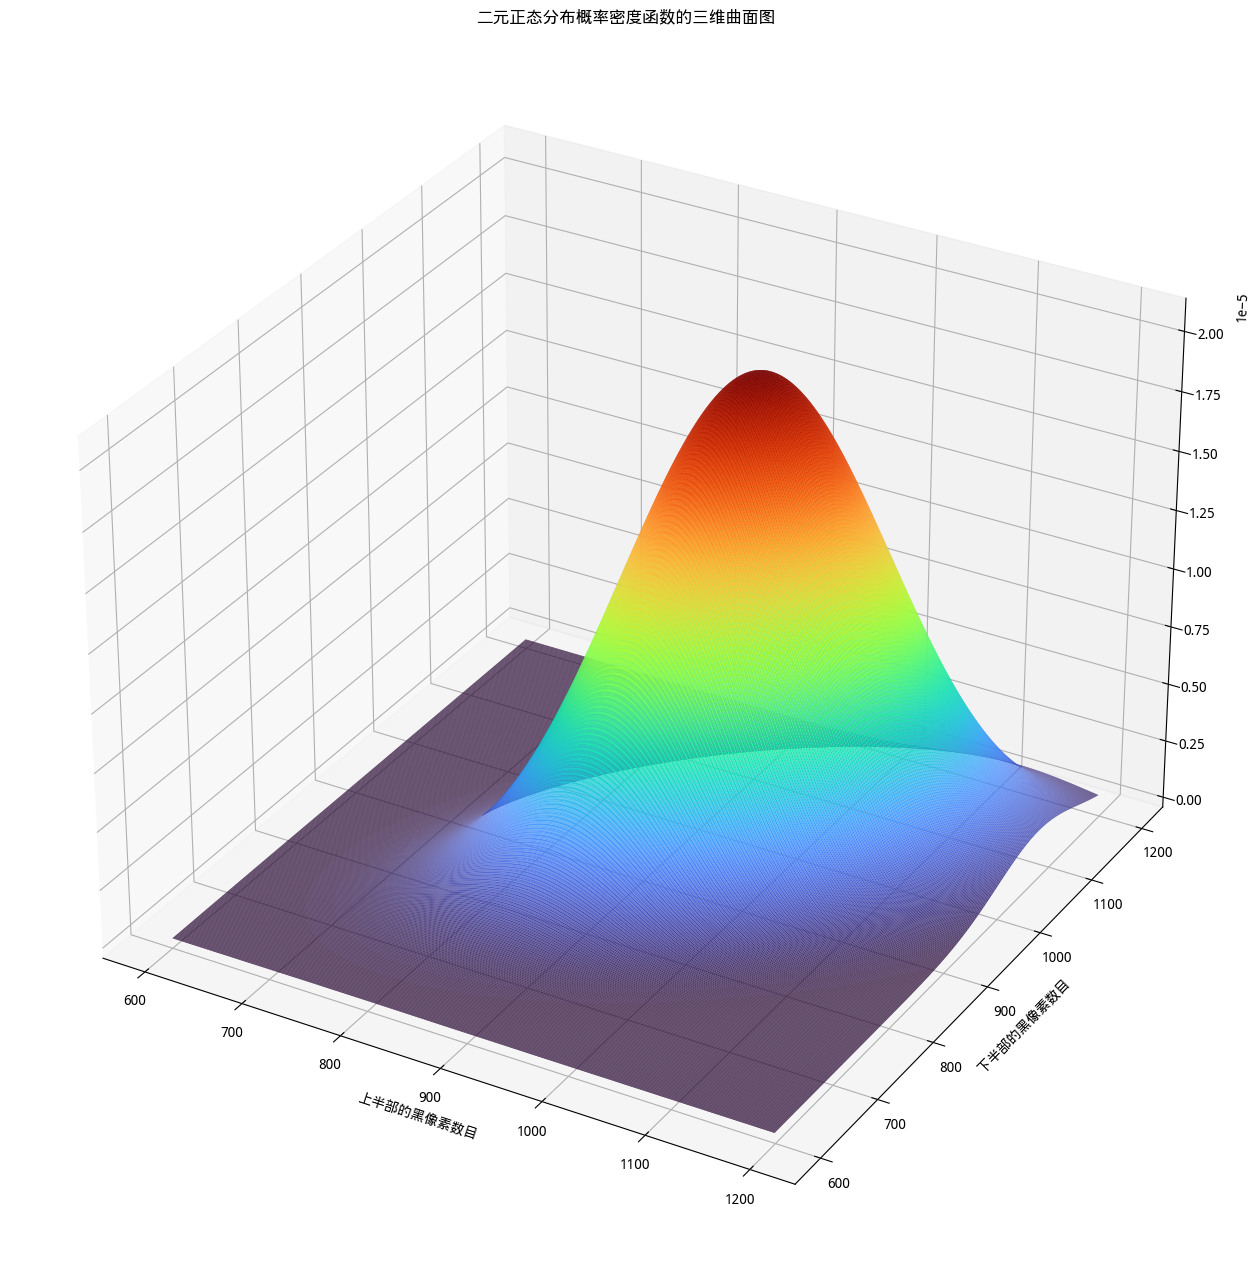

In [4]:
# >>> TODO
vec = [[up[i], dn[i]] for i in range(len(image))]
up_mean = np.mean(up)
dn_mean = np.mean(dn)
average = np.mean(vec, axis=0)
# <<< TODO
print(average) #打印估计的均值向量

# >>> TODO
cov = np.cov([up, dn])
# <<< TODO
print(cov) #打印估计的协方差矩阵

# >>> TODO #绘图
up_std = np.std(up)
dn_std = np.std(dn)
rho = (cov[0, 1]) / (up_std*dn_std)
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
x = np.arange(600, 1200, 1)
y = np.arange(600, 1200, 1)
x, y = np.meshgrid(x, y)
z = np.exp(-(((x-up_mean)/up_std)*((x-up_mean)/up_std)-2*rho*((x-up_mean)/up_std)*((y-dn_mean)/dn_std)+((y-dn_mean)/dn_std)*((y-dn_mean)/dn_std))/(2*(1-rho*rho)))/(2*np.pi*up_std*dn_std*np.sqrt(1-rho*rho))
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='turbo')
ax.set_xlabel('上半部的黑像素数目')
ax.set_ylabel('下半部的黑像素数目')
ax.set_title('二元正态分布概率密度函数的三维曲面图')
# <<< TODO

4. 在大作业1中，我们计算了不同算法的运行时间（例如 Numpy采用循环计算，Numpy矩阵计算，Pytorch Tensor矩阵计算），为了使结果更加直观，我们用条形图来对实验中得到的各个部分的运行时间进行展示。如有需要，可以考虑利用`plt.yscale("log")`设置条形图纵坐标为对数坐标，使图像更为清晰。

Text(0.5, 0.98, '不同算法的运行时间')

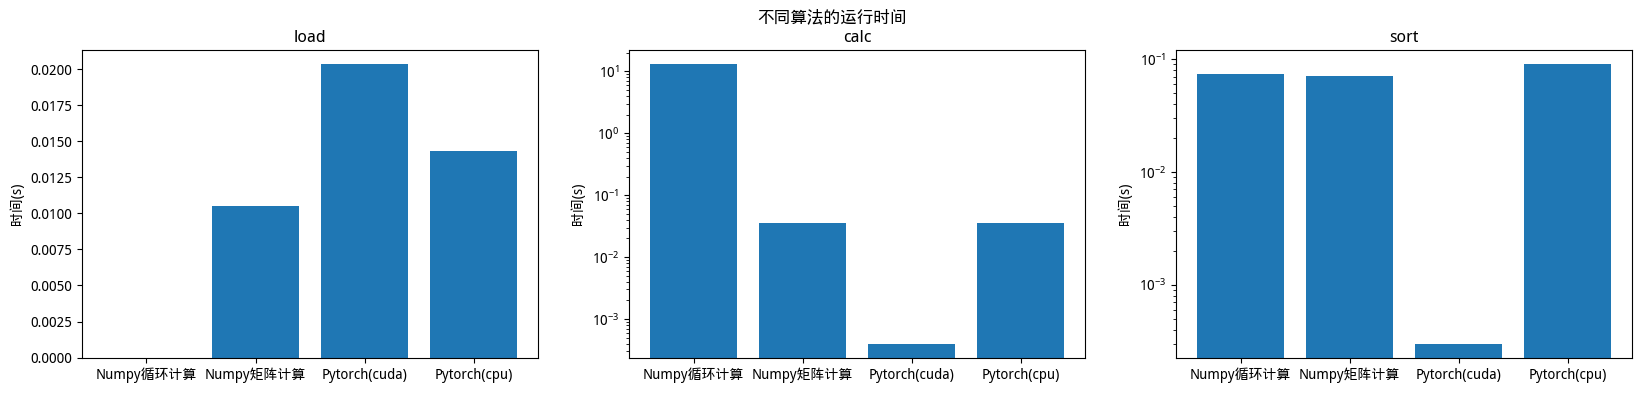

In [5]:
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']# 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

N = 4 #load,calc,sort向量中四个元素依次对应'Numpy循环计算', 'Numpy矩阵计算', 'Pytorch(cuda)', 'Pytorch(cpu)'
load = (0, 0.0105, 0.0203, 0.0143)  # 作业中得到的时间数据
calc = (13.2734, 0.0362, 0.0004, 0.0360)
sort = (0.0742, 0.0713, 0.0003, 0.0913)

# >>> TODO
names = ['Numpy循环计算', 'Numpy矩阵计算', 'Pytorch(cuda)', 'Pytorch(cpu)']
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.bar(names, load)
plt.title('load')
plt.ylabel('时间(s)')
plt.subplot(132)
plt.yscale('log')
plt.bar(names, calc)
plt.title('calc')
plt.ylabel('时间(s)')
plt.subplot(133)
plt.yscale('log')
plt.bar(names, sort)
plt.title('sort')
plt.ylabel('时间(s)')
plt.suptitle('不同算法的运行时间')
# <<< TODO